**Importing Required Libraries**

In [1]:
# Packages
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Tensorflow packages
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import load_model
import math

**Data Loading and Spliting**

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

**Data Preparation**

In [3]:
# Fixation of Axis for the dataset
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

# Binary classes 
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

**Create Model**

In [4]:
# LeNet5 base model layers
class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()
        self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding="same"))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='relu'))
        self.add(Dense(84, activation='relu'))
        self.add(Dense(nb_classes, activation='softmax'))
        self.compile(optimizer='adam',
                    loss=categorical_crossentropy,
                    metrics=['accuracy'])

In [5]:
# LeNet5 model layers with L2 weight decay regularization
class LeNetReguL2(Sequential):
    def __init__(self, input_shape, nb_classes, l2_value = 0.01):
        super().__init__()
        self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding="same", kernel_regularizer=l2(l2_value)))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid', kernel_regularizer=l2(l2_value)))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='relu', kernel_regularizer=l2(l2_value)))
        self.add(Dense(84, activation='relu', kernel_regularizer=l2(l2_value)))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(optimizer='adam',
                    loss=categorical_crossentropy,
                    metrics=['accuracy'])

In [6]:
# LeNet5 model layers with L1 weight decay regularization
class LeNetReguL1(Sequential):
    def __init__(self, input_shape, nb_classes, l1_value = 0.01):
        super().__init__()
        self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding="same", kernel_regularizer=l1(l1_value)))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid', kernel_regularizer=l1(l1_value)))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='relu', kernel_regularizer=l1(l1_value)))
        self.add(Dense(84, activation='relu', kernel_regularizer=l1(l1_value)))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(optimizer='adam',
                    loss=categorical_crossentropy,
                    metrics=['accuracy'])

In [7]:
# LeNet5 model without fully-connected layers
class LeNetGAP(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()
        self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding="same"))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(GlobalMaxPooling2D())
        # self.add(GlobalMaxPooling2D())
        self.add(Dense(nb_classes, activation='softmax'))
        self.compile(optimizer='adam',
                    loss=categorical_crossentropy,
                    metrics=['accuracy'])

In [8]:
# # LeNet5 model experiments layers
# class Temp(Sequential):
#     def __init__(self, input_shape, nb_classes):
#         super().__init__()
#         # self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding="same", kernel_regularizer=l2(0.01)))
#         self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding="same", kernel_regularizer=l1(0.01)))
#         self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
#         # self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid', kernel_regularizer=l2(0.01)))
#         self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid', kernel_regularizer=l1(0.01)))
#         self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
#         # self.add(Flatten())
#         # self.add(Dense(120, activation='relu'))
#         self.add(GlobalMaxPooling2D())
#         # self.add(Dense(84, activation='relu'))
#         # self.add(GlobalMaxPooling2D())
#         self.add(Dense(nb_classes, activation='softmax'))
#         # self.add(AveragePooling2D())
#         self.compile(optimizer='adam',
#                     loss=categorical_crossentropy,
#                     metrics=['accuracy'])

**Sparsity Coefficient**

In [39]:
# def gini_coefficient(x):
#     mad = np.abs(np.subtract.outer(x, x)).mean()
#     rmad = mad/np.mean(x)
#     g = 0.5 * rmad
#     return g
    
def hoyer_index(x):
  rows,columns = x.shape
  f_up = 0
  f_down = 0
  for row in range (rows):
    for column in range (columns):
      if x[row, column] != 0:
        f_up = f_up + np.absolute(x[row, column]) 
        f_down = f_down + (x[row, column])**2
  f_down = (f_down)**(0.5)
  h_index = (((rows*columns)**(0.5)) - (f_up/f_down))/(((rows*columns)**(0.5))-1)
  return h_index


x = np.zeros((100,100))
x [5,2] = 1
hoyer_index(x)

1.0

**Construct Model**

In [10]:
modelLeNet = LeNet(x_train[0].shape, num_classes)
modelLeNetReguL2v1 = LeNetReguL2(x_train[0].shape, num_classes, l2_value = 0.01)
modelLeNetReguL2v2 = LeNetReguL2(x_train[0].shape, num_classes, l2_value = 0.02)
modelLeNetReguL1v1 = LeNetReguL1(x_train[0].shape, num_classes, l1_value = 0.01)
modelLeNetReguL1v2 = LeNetReguL1(x_train[0].shape, num_classes, l1_value = 0.01)
modelLeNetGAP = LeNetGAP(x_train[0].shape, num_classes)
# model.summary()
# !pip install ipdb
# import ipdb; ipdb.set_trace()

**Timing**

In [11]:
import time
class TimeHistory(tf.keras.callbacks.Callback):
    test_time_start = 0
    def on_train_begin(self, logs={}):
        self.times = []

    def on_test_begin(self, batch, logs={}):
        self.test_time_start = time.time()

    def on_test_end(self, batch, logs={}):
        self.times.append(time.time() - self.test_time_start)
# reference: https://stackoverflow.com/questions/43178668/record-the-computation-time-for-each-epoch-in-keras-during-model-fit 

**Training the model**

In [12]:
run_times_LeNet = []
run_times_LeNetReguL2v1 = []
run_times_LeNetReguL2v2 = []
run_times_LeNetReguL1v1 = []
run_times_LeNetReguL1v2 = []
run_times_LeNetGAP = []
no_of_epochs = 5

for i in range(0, 3):
  time_callback = TimeHistory()
  log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
  historyLeNet = modelLeNet.fit(x_train, y=y_train, 
            epochs=no_of_epochs, 
            validation_data=(x_test, y_test), 
            callbacks=[tensorboard_callback, time_callback],
            )
  run_times_LeNet.append(historyLeNet.history['val_loss'][-1])
  model_info_LeNet = {'TrainingError':historyLeNet.history['loss'][-1],'TestError': historyLeNet.history['val_loss'][-1], 'SDTestError':run_times_LeNet, 'InferenceTime':time_callback.times[-1], 'NoofParameters':modelLeNet.count_params()}
  modelLeNet.save('modelLeNet.h5')
  # del modelLeNet

  time_callback = TimeHistory()
  log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
  historyLeNetReguL2v1 = modelLeNetReguL2v1.fit(x_train, y=y_train, 
            epochs=no_of_epochs, 
            validation_data=(x_test, y_test), 
            callbacks=[tensorboard_callback, time_callback],
            )
  run_times_LeNetReguL2v1.append(historyLeNetReguL2v1.history['val_loss'][-1])
  model_info_LeNetReguL2v1 = {'TrainingError':historyLeNetReguL2v1.history['loss'][-1],'TestError': historyLeNetReguL2v1.history['val_loss'][-1], 'SDTestError':run_times_LeNetReguL2v1, 'InferenceTime':time_callback.times[-1], 'NoofParameters':modelLeNetReguL2v1.count_params()}  
  modelLeNetReguL2v1.save('modelLeNetReguL2v1.h5')
  # del modelLeNetReguL2v1


  time_callback = TimeHistory()
  log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
  historyLeNetReguL2v2 = modelLeNetReguL2v2.fit(x_train, y=y_train, 
            epochs=no_of_epochs, 
            validation_data=(x_test, y_test), 
            callbacks=[tensorboard_callback, time_callback],
            )
  run_times_LeNetReguL2v2.append(historyLeNetReguL2v2.history['val_loss'][-1])
  model_info_LeNetReguL2v2 = {'TrainingError':historyLeNetReguL2v2.history['loss'][-1],'TestError': historyLeNetReguL2v2.history['val_loss'][-1], 'SDTestError':run_times_LeNetReguL2v2, 'InferenceTime':time_callback.times[-1], 'NoofParameters':modelLeNetReguL2v2.count_params()}
  modelLeNetReguL2v2.save('modelLeNetReguL2v2.h5')
  # del modelLeNetReguL2v2

  time_callback = TimeHistory()
  log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
  historyLeNetReguL1v1 = modelLeNetReguL1v1.fit(x_train, y=y_train, 
            epochs=no_of_epochs, 
            validation_data=(x_test, y_test), 
            callbacks=[tensorboard_callback, time_callback],
            )
  run_times_LeNetReguL1v1.append(historyLeNetReguL1v1.history['val_loss'][-1])
  model_info_LeNetReguL1v1 = {'TrainingError':historyLeNetReguL1v1.history['loss'][-1],'TestError': historyLeNetReguL1v1.history['val_loss'][-1], 'SDTestError':run_times_LeNetReguL1v1, 'InferenceTime':time_callback.times[-1], 'NoofParameters':modelLeNetReguL1v1.count_params()}
  modelLeNetReguL1v1.save('modelLeNetReguL1v1.h5')
  # del modelLeNetReguL1v1
   

  time_callback = TimeHistory()
  log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
  historyLeNetReguL1v2 = modelLeNetReguL1v2.fit(x_train, y=y_train, 
            epochs=no_of_epochs, 
            validation_data=(x_test, y_test), 
            callbacks=[tensorboard_callback, time_callback],
            )
  run_times_LeNetReguL1v2.append(historyLeNetReguL1v2.history['val_loss'][-1])
  model_info_LeNetReguL1v2 = {'TrainingError':historyLeNetReguL1v2.history['loss'][-1],'TestError': historyLeNetReguL1v2.history['val_loss'][-1], 'SDTestError':run_times_LeNetReguL1v2, 'InferenceTime':time_callback.times[-1], 'NoofParameters':modelLeNetReguL1v2.count_params()}
  modelLeNetReguL1v2.save('modelLeNetReguL1v2.h5')
  # del modelLeNetReguL1v2

  time_callback = TimeHistory()
  log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
  historyLeNetGAP = modelLeNetGAP.fit(x_train, y=y_train, 
            epochs=no_of_epochs, 
            validation_data=(x_test, y_test), 
            callbacks=[tensorboard_callback, time_callback],
            )
  run_times_LeNetGAP.append(historyLeNetGAP.history['val_loss'][-1])
  model_info_LeNetGAP = {'TrainingError':historyLeNetGAP.history['loss'][-1],'TestError': historyLeNetGAP.history['val_loss'][-1], 'SDTestError':run_times_LeNetGAP, 'InferenceTime':time_callback.times[-1], 'NoofParameters':modelLeNetGAP.count_params()}
  modelLeNetGAP.save('modelLeNetGAP.h5')
  # del modelLeNetGAP
  

Epoch 1/5
   1/1875 [..............................] - ETA: 0s - loss: 2.2845 - accuracy: 0.1562WARNING:tensorflow:From /home/ubuntu/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5478 - accuracy: 0.7973 - val_loss: 0.4485 - val_accuracy: 0.8342
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3734 - accuracy: 0.8614 - val_loss: 0.3646 - val_accuracy: 0.8631
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3238 - accuracy: 0.8804 - val_loss: 0.3427 - val_accuracy: 0.8735
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2931 - accuracy: 0.8908 - val_loss: 0.3339 - val_accuracy: 0.8777
Epoch 5/5
1875/1875 [===========================

**Number of parameters for the models**

In [13]:
# modelLeNet = load_model('modelLeNet.h5')
# modelLeNetReguL2v1 = load_model('modelLeNetReguL2v1.h5')
# modelLeNetReguL2v2 = load_model('modelLeNetReguL2v2.h5')
# modelLeNetReguL1v1 = load_model('modelLeNetReguL1v1.h5')
# modelLeNetReguL1v2 = load_model('modelLeNetReguL1v2.h5')
# modelLeNetGAP = load_model('modelLeNetGAP.h5')


print('Parameters of modelLeNet: {:.4f}'.format(modelLeNet.count_params()))
print('Parameters of modelLeNetReguL2v1: {:.4f}'.format(modelLeNetReguL2v1.count_params()))
print('Parameters of modelLeNetReguL2v2: {:.4f}'.format(modelLeNetReguL2v2.count_params()))
print('Parameters of modelLeNetReguL1v1: {:.4f}'.format(modelLeNetReguL1v1.count_params()))
print('Parameters of modelLeNetReguL1v2: {:.4f}'.format(modelLeNetReguL1v2.count_params()))
print('Parameters of modelLeNetGAP: {:.4f}'.format(modelLeNetGAP.count_params()))

Parameters of modelLeNet: 61706.0000
Parameters of modelLeNetReguL2v1: 61706.0000
Parameters of modelLeNetReguL2v2: 61706.0000
Parameters of modelLeNetReguL1v1: 61706.0000
Parameters of modelLeNetReguL1v2: 61706.0000
Parameters of modelLeNetGAP: 2742.0000


**Summary Table**

In [14]:
modelLeNet.summary()
modelLeNetReguL2v1.summary()
modelLeNetReguL2v2.summary()
modelLeNetReguL1v1.summary()
modelLeNetReguL1v2.summary()
modelLeNetGAP.summary()

Model: "le_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164

In [15]:
# Table
model_info = ['LeNet','LeNetReguL2v1','LeNetReguL2v2','LeNetReguL1v1','LeNetReguL1v2', 'LeNetGAP']
print('Model\t\t\tTraining Error\t\t\tTest Error\t\t\tSD 0f Test Error\t\t\tInference Time\t\t\tNo. of Parameters')
print('-----------------\t-----------------\t\t-----------------\t\t-----------------\t\t\t-----------------\t\t-----------------')
print(str(model_info[0]) + '\t\t\t' + str(model_info_LeNet['TrainingError']) + '\t\t' + str(model_info_LeNet['TestError'])+ '\t\t' + str(np.std(model_info_LeNet['SDTestError']))+ '\t\t\t' + str(model_info_LeNet['InferenceTime'])+ '\t\t' + str(model_info_LeNet['NoofParameters']))
print(str(model_info[1]) + '\t\t' + str(model_info_LeNetReguL2v1['TrainingError']) + '\t\t' + str(model_info_LeNetReguL2v1['TestError'])+ '\t\t' + str(np.std(model_info_LeNetReguL2v1['SDTestError']))+ '\t\t\t' + str(model_info_LeNetReguL2v1['InferenceTime'])+ '\t\t' + str(model_info_LeNetReguL2v1['NoofParameters']))
print(str(model_info[2]) + '\t\t' + str(model_info_LeNetReguL2v2['TrainingError']) + '\t\t' + str(model_info_LeNetReguL2v2['TestError'])+ '\t\t' + str(np.std(model_info_LeNetReguL2v2['SDTestError']))+ '\t\t\t' + str(model_info_LeNetReguL2v2['InferenceTime'])+ '\t\t' + str(model_info_LeNetReguL2v2['NoofParameters']))
print(str(model_info[3]) + '\t\t' + str(model_info_LeNetReguL1v1['TrainingError']) + '\t\t' + str(model_info_LeNetReguL1v1['TestError'])+ '\t\t' + str(np.std(model_info_LeNetReguL1v1['SDTestError']))+ '\t\t\t' + str(model_info_LeNetReguL1v1['InferenceTime'])+ '\t\t' + str(model_info_LeNetReguL1v1['NoofParameters']))
print(str(model_info[4]) + '\t\t' + str(model_info_LeNetReguL1v2['TrainingError']) + '\t\t' + str(model_info_LeNetReguL1v2['TestError'])+ '\t\t' + str(np.std(model_info_LeNetReguL1v2['SDTestError']))+ '\t\t\t' + str(model_info_LeNetReguL1v2['InferenceTime'])+ '\t\t' + str(model_info_LeNetReguL1v2['NoofParameters']))
print(str(model_info[5]) + '\t\t' + str(model_info_LeNetGAP['TrainingError']) + '\t\t' + str(model_info_LeNetGAP['TestError'])+ '\t\t' + str(np.std(model_info_LeNetGAP['SDTestError']))+ '\t\t\t' + str(model_info_LeNetGAP['InferenceTime'])+ '\t\t' + str(model_info_LeNetGAP['NoofParameters']))


Model			Training Error			Test Error			SD 0f Test Error			Inference Time			No. of Parameters
-----------------	-----------------		-----------------		-----------------			-----------------		-----------------
LeNet			0.15851141512393951		0.3083064556121826		0.007505538223938842			0.8528482913970947		61706
LeNetReguL2v1		0.5616891980171204		0.5736199021339417		0.03166930121361471			0.878307580947876		61706
LeNetReguL2v2		0.6731531620025635		0.6875057816505432		0.040464484442225626			0.8369247913360596		61706
LeNetReguL1v1		0.9395244717597961		0.9516729712486267		0.02601441622465937			0.8399224281311035		61706
LeNetReguL1v2		0.9486860632896423		0.9581499099731445		0.025203893592643113			0.7941558361053467		61706
LeNetGAP		0.37653425335884094		0.4078139066696167		0.02924511829714039			0.7626855373382568		2742


**Sparsity of layers**

Sparsity of layer 5 - modelLeNet: 0.26
Sparsity of layer 6 - modelLeNet: 0.23
Sparsity of layer 5 - modelLeNetReguL2v1: 0.84
Sparsity of layer 6 - modelLeNetReguL2v1: 0.79
Sparsity of layer 5 - modelLeNetReguL2v2: 0.89
Sparsity of layer 6 - modelLeNetReguL2v2: 0.80
Sparsity of layer 5 - modelLeNetReguL1v1: 0.96
Sparsity of layer 6 - modelLeNetReguL1v1: 0.95
Sparsity of layer 5 - modelLeNetReguL1v2: 0.96
Sparsity of layer 6 - modelLeNetReguL1v2: 0.95


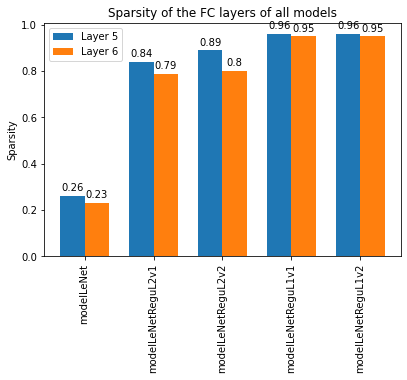

In [40]:
l5modelLeNet = round(hoyer_index(modelLeNet.layers[5].get_weights()[0]),2)
l6modelLeNet = round(hoyer_index(modelLeNet.layers[6].get_weights()[0]),2)

l5modelLeNetReguL2v1 = round(hoyer_index(modelLeNetReguL2v1.layers[5].get_weights()[0]),2)
l6modelLeNetReguL2v1 = round(hoyer_index(modelLeNetReguL2v1.layers[6].get_weights()[0]),2)

l5modelLeNetReguL2v2 = round(hoyer_index(modelLeNetReguL2v2.layers[5].get_weights()[0]),2)
l6modelLeNetReguL2v2 = round(hoyer_index(modelLeNetReguL2v2.layers[6].get_weights()[0]),2)

l5modelLeNetReguL1v1 = round(hoyer_index(modelLeNetReguL1v1.layers[5].get_weights()[0]),2)
l6modelLeNetReguL1v1 = round(hoyer_index(modelLeNetReguL1v1.layers[6].get_weights()[0]),2)

l5modelLeNetReguL1v2 = round(hoyer_index(modelLeNetReguL1v2.layers[5].get_weights()[0]),2)
l6modelLeNetReguL1v2 = round(hoyer_index(modelLeNetReguL1v2.layers[6].get_weights()[0]),2)

print('Sparsity of layer 5 - modelLeNet: {:.2f}'.format(l5modelLeNet))
print('Sparsity of layer 6 - modelLeNet: {:.2f}'.format(l6modelLeNet))

print('Sparsity of layer 5 - modelLeNetReguL2v1: {:.2f}'.format(l5modelLeNetReguL2v1))
print('Sparsity of layer 6 - modelLeNetReguL2v1: {:.2f}'.format(l6modelLeNetReguL2v1))

print('Sparsity of layer 5 - modelLeNetReguL2v2: {:.2f}'.format(l5modelLeNetReguL2v2))
print('Sparsity of layer 6 - modelLeNetReguL2v2: {:.2f}'.format(l6modelLeNetReguL2v2))

print('Sparsity of layer 5 - modelLeNetReguL1v1: {:.2f}'.format(l5modelLeNetReguL1v1))
print('Sparsity of layer 6 - modelLeNetReguL1v1: {:.2f}'.format(l6modelLeNetReguL1v1))

print('Sparsity of layer 5 - modelLeNetReguL1v2: {:.2f}'.format(l5modelLeNetReguL1v2))
print('Sparsity of layer 6 - modelLeNetReguL1v2: {:.2f}'.format(l6modelLeNetReguL1v2))


import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['modelLeNet', 'modelLeNetReguL2v1', 'modelLeNetReguL2v2', 'modelLeNetReguL1v1', 'modelLeNetReguL1v2']
layer_5 = [l5modelLeNet, l5modelLeNetReguL2v1, l5modelLeNetReguL2v2, l5modelLeNetReguL1v1, l5modelLeNetReguL1v2]
layer_6 = [l6modelLeNet, l6modelLeNetReguL2v1, l6modelLeNetReguL2v2, l6modelLeNetReguL1v1, l6modelLeNetReguL1v2]

# locations of the labels
x = np.arange(len(labels))
# set the width of each element of the group  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, layer_5, width, label='Layer 5')
rects2 = ax.bar(x + width/2, layer_6, width, label='Layer 6')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sparsity')
ax.set_title('Sparsity of the FC layers of all models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Sparcity above each bar."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

# Reference: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

**Board**

In [17]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 21495), started 7:43:59 ago. (Use '!kill 21495' to kill it.)